Importation des données


In [1]:
#importation des bibliothèques necessaires
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, auc
%matplotlib inline


In [2]:
#importation des données
data1 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

Compréhension des données

In [3]:
#afficher les premiers données 
print(data1.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
#Générez des statistiques descriptives
data1.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
#Générez des statistiques descriptives
data1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data1.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#vérifier qu'il n'ya pas des valeurs manquantes
data1.isna().values.any()

False

In [8]:
data1.shape

(7043, 21)

In [9]:
data1["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
data1.isnull().sum().sum()

0

In [11]:
data1.notnull().values.any()

True

In [12]:
data1.notnull().sum().sum()

147903

In [13]:
data1.fillna(data1.mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [14]:
#supprimer les lignes ayant des valeurs null
data1.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [15]:
data1.drop(["customerID"],axis=1,inplace = True)

In [16]:
data1.shape

(7043, 20)

Visualisation des données

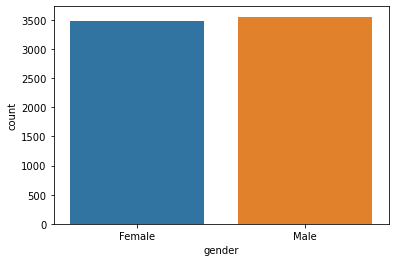

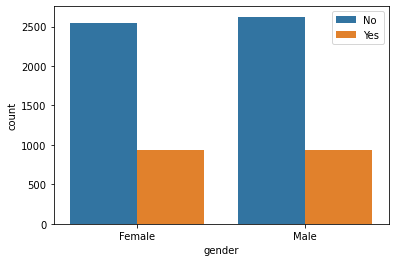

In [17]:
#visualisation du figure du sexe 
plt.figure()
sns.countplot(x="gender", data=data1)
plt.figure()
sns.countplot(x="gender", hue="Churn", data=data1)
plt.legend()

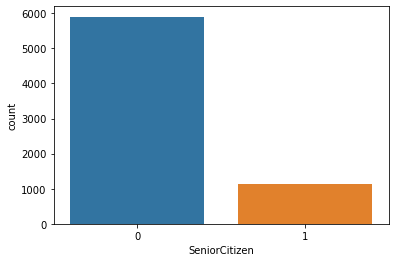

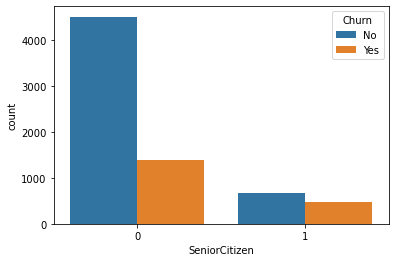

In [18]:
#visualisation du figure du citoyen senior 
plt.figure()
sns.countplot(x="SeniorCitizen", data=data1)
plt.figure()
sns.countplot(x="SeniorCitizen", hue="Churn", data=data1)



 observation :Il y a beaucoup moins de seniors qui ont l'intention de désabonner 


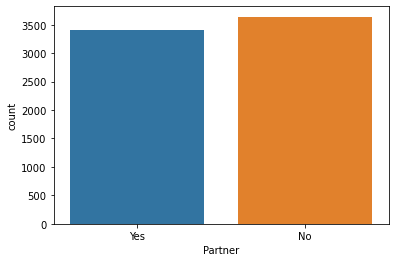

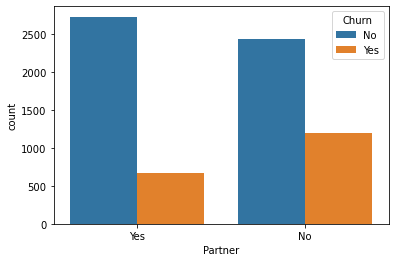

In [19]:
#visualisation du figure du partenaire
plt.figure()
sns.countplot(x="Partner", data=data1)
plt.figure()
sns.countplot(x="Partner", hue="Churn", data=data1)

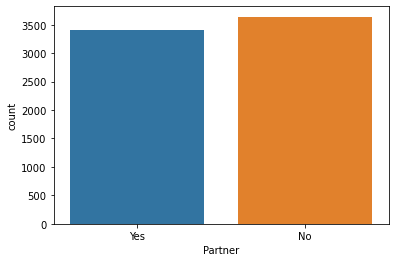

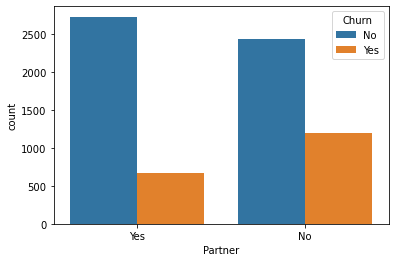

In [20]:
#visualisation du figure du partenaire
plt.figure()
sns.countplot(x="Partner", data=data1)
plt.figure()
sns.countplot(x="Partner", hue="Churn", data=data1)


 observation :Il y a beaucoup moins de seniors qui ont l'intention de désabonner 


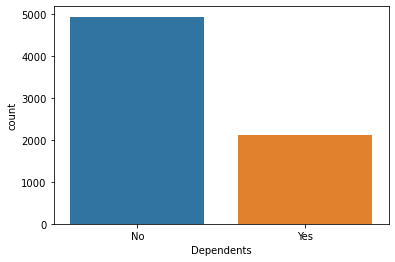

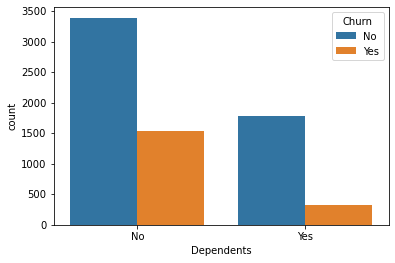

In [21]:
#visualisation du figure du citoyen dépendent 
plt.figure()
sns.countplot(x="Dependents", data=data1)
plt.figure()
sns.countplot(x="Dependents", hue="Churn", data=data1)


il y a beaucoup moins de personnes avec personnes à charge, il y a une plus grande proportion de personnes sans personne à charge

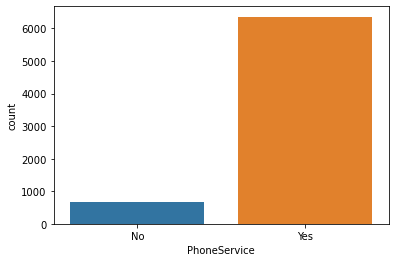

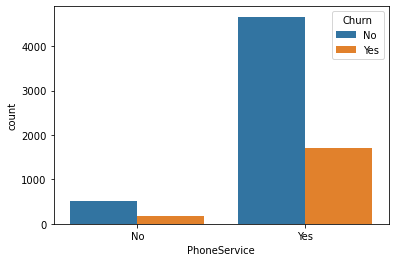

In [22]:
#visualisation du figure du téléphone service 
plt.figure()
sns.countplot(x="PhoneService", data=data1)
plt.figure()
sns.countplot(x="PhoneService", hue="Churn", data=data1)

il y a beaucoup plus de gens avec un service téléphonique qui ont l'intention de désabonnement 

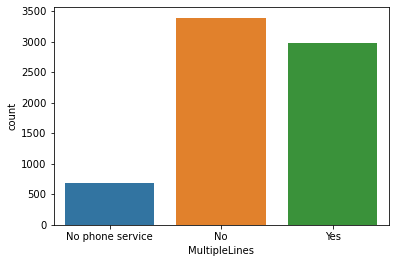

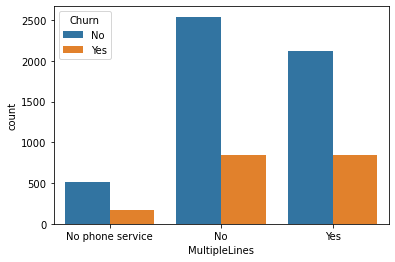

In [23]:
#visualisation du figure du multiple lignes
plt.figure()
sns.countplot(x="MultipleLines", data=data1)
plt.figure()
sns.countplot(x="MultipleLines", hue="Churn", data=data1)

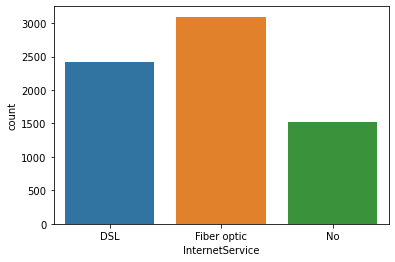

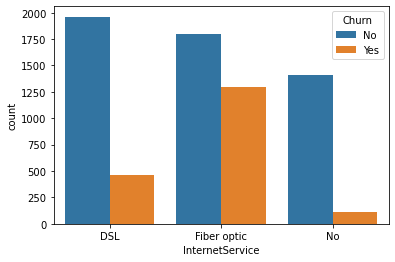

In [24]:
#visualisation du figure du service internet 
plt.figure()
sns.countplot(x="InternetService", data=data1)
plt.figure()
sns.countplot(x="InternetService", hue="Churn", data=data1)


Il y a beaucoup plus de personnes qui ont un service Internet et il y a une grande proportion de personnes avec un service Internet par fibre optique qui ont l'intention de desabonner 

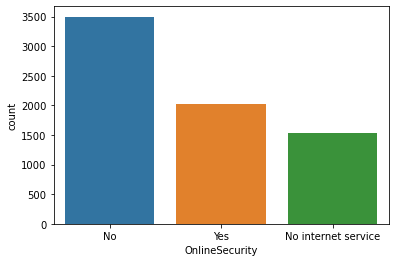

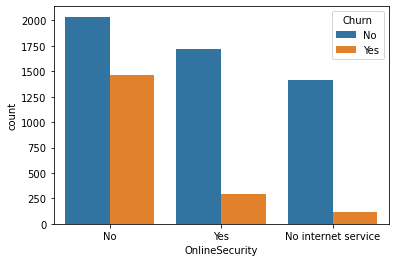

In [25]:
#visualisation du figure du securité en ligne 
plt.figure()
sns.countplot(x="OnlineSecurity", data=data1)
plt.figure()
sns.countplot(x="OnlineSecurity", hue="Churn", data=data1)

pour ceux qui disposent d'un service Internet, il y a plus de personnes sans sécurité en ligne et une grande proportion du même groupe de personnes a changé

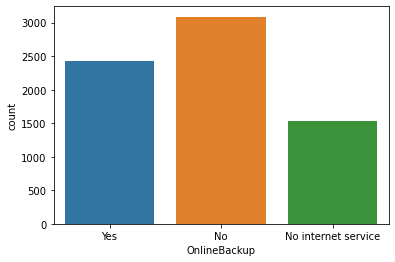

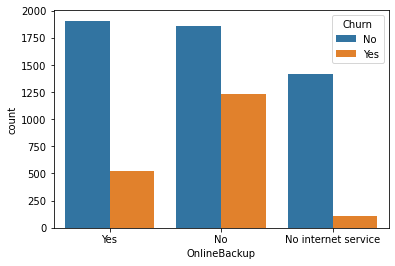

In [26]:

plt.figure()
sns.countplot(x="OnlineBackup", data=data1)
plt.figure()
sns.countplot(x="OnlineBackup", hue="Churn", data=data1)

pour ceux qui disposent d'un service Internet, il y a plus de personnes sans sauvegarde en ligne qui ont l'intention de desabonnement 

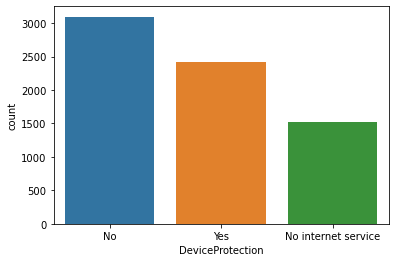

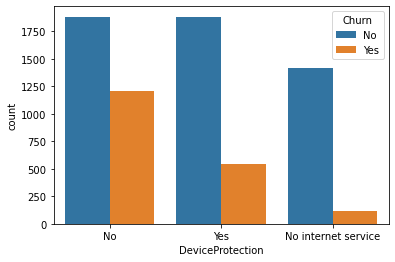

In [27]:
plt.figure()
sns.countplot(x="DeviceProtection", data=data1)
plt.figure()
sns.countplot(x="DeviceProtection", hue="Churn", data=data1)

Pour ceux qui disposent d'un service Internet, il y a plus de personnes sans protection de l'appareil qui ont l'intention de desabonnement 

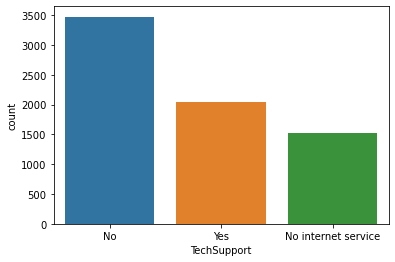

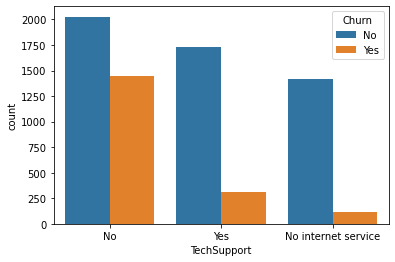

In [28]:
plt.figure()
sns.countplot(x="TechSupport", data=data1)
plt.figure()
sns.countplot(x="TechSupport", hue="Churn", data=data1)

pour ceux qui disposent d'un service Internet, il y a plus de personnes sans support technique ont l'intention de desabonnement 

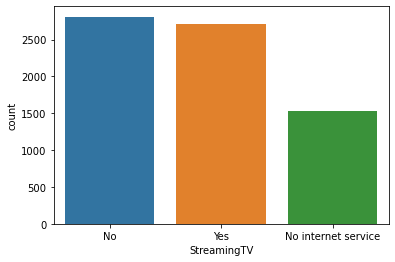

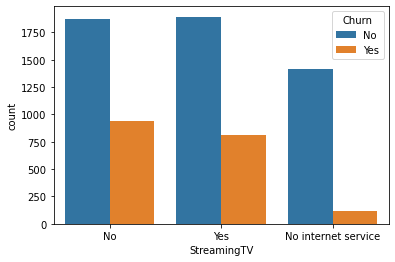

In [29]:
plt.figure()
sns.countplot(x="StreamingTV", data=data1)
plt.figure()
sns.countplot(x="StreamingTV", hue="Churn", data=data1)

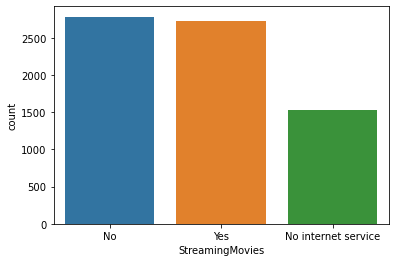

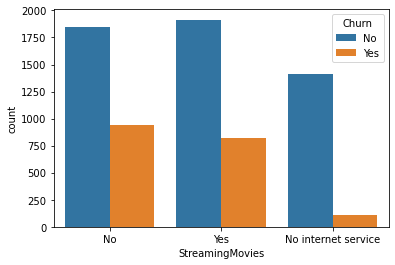

In [30]:
plt.figure()
sns.countplot(x="StreamingMovies", data=data1)
plt.figure()
sns.countplot(x="StreamingMovies", hue="Churn", data=data1)

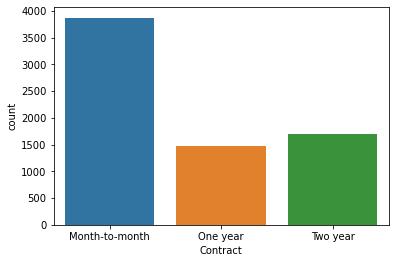

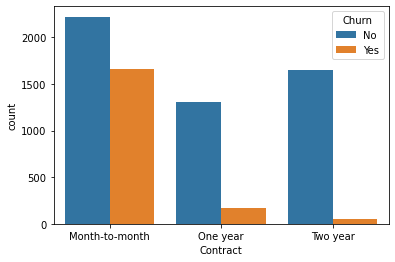

In [31]:
plt.figure()
sns.countplot(x="Contract", data=data1)
plt.figure()
sns.countplot(x="Contract", hue="Churn", data=data1)

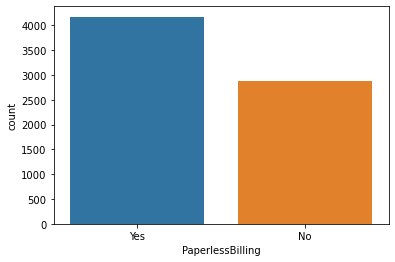

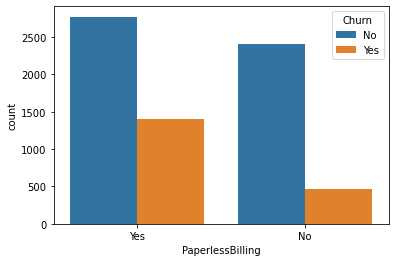

In [32]:
plt.figure()
sns.countplot(x="PaperlessBilling", data=data1)
plt.figure()
sns.countplot(x="PaperlessBilling", hue="Churn", data=data1)

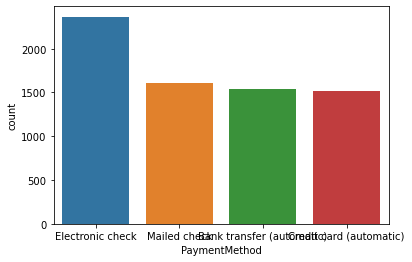

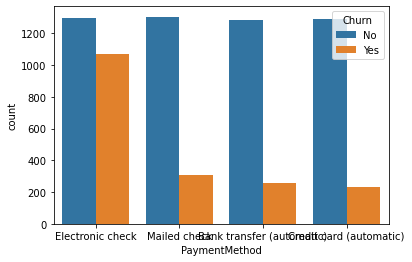

In [33]:
plt.figure()
sns.countplot(x="PaymentMethod", data=data1)
plt.figure()
sns.countplot(x="PaymentMethod", hue="Churn", data=data1)

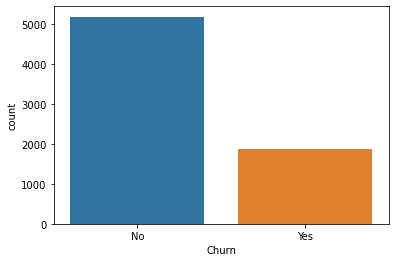

In [34]:
sns.countplot(x="Churn", data=data1)


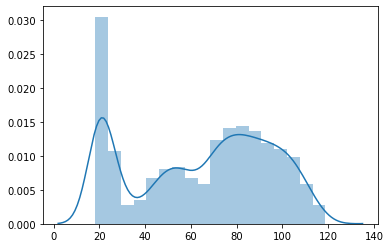

In [35]:
sns.distplot(data1["MonthlyCharges"].tolist())


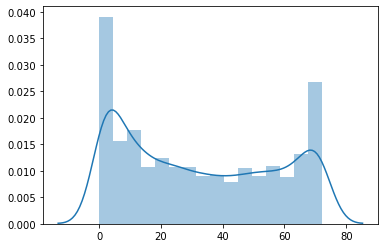

In [36]:
sns.distplot(data1["tenure"].tolist())


In [37]:
data1["tenure"].describe()


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

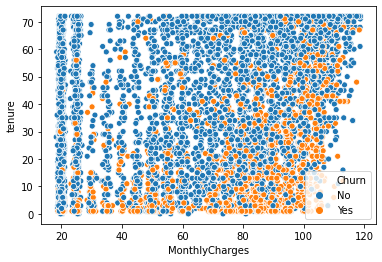

In [38]:
sns.scatterplot(x="MonthlyCharges", y="tenure", hue="Churn",
                     data=data1)

Data cleaning 

In [39]:
data1.drop(["gender","PhoneService","MultipleLines","MonthlyCharges","TotalCharges"],axis=1,inplace = True)

In [40]:
#Remplacez les colonnes de texte par des entiers.
#Les colonnes ci-dessous incluent des valeurs de texte similaires, je les ai donc modifiées une fois.

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    data1[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in data1[item]]
    
data1.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0
1,0,0,0,34,DSL,1,0,1,0,0,0,One year,0,Mailed check,0
2,0,0,0,2,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,1
3,0,0,0,45,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),0
4,0,0,0,2,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,1


In [41]:
data1["InternetService"].replace(["Fiber optic","DSL","No"],[0,1,2],inplace= True)

In [42]:
#CONTARCT
data1["Contract"].replace(["Month-to-month","Two year","One year"],[0,1,2],inplace = True)

In [43]:
data1["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [44]:
#PAYMENT METHOD
data1["PaymentMethod"].replace(["Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)"],[0,1,2,3],inplace =True)

In [45]:
data1.shape

(7043, 15)

data1.head

In [46]:
X= data1.iloc[:,0:14].values
y= pd.factorize(data1['Churn'])[0]

In [47]:
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int32)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

#Centrage Réduction avec MinMaxScaler(): appliquer la fonction (xi-xmin)/(xmax-xmin)

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [50]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [51]:
y_pred = svclassifier.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1283  285]
 [ 259  286]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1568
           1       0.50      0.52      0.51       545

    accuracy                           0.74      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.75      0.74      0.74      2113



In [55]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

In [57]:
y_pred = svclassifier.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1419  149]
 [ 267  278]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1568
           1       0.65      0.51      0.57       545

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [59]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [60]:
y_pred = svclassifier.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1104  464]
 [ 443  102]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1568
           1       0.18      0.19      0.18       545

    accuracy                           0.57      2113
   macro avg       0.45      0.45      0.45      2113
weighted avg       0.58      0.57      0.57      2113

